<a href="https://colab.research.google.com/github/DeHawk/TensorFlow/blob/master/Linear_Regression_Teras_Real_World_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x

In [3]:
# imports
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# adjust display options
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [4]:
#import dataset

training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

#scale
training_df['median_house_value'] /= 1000

training_df.head(n=3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7


In [5]:
# stats on dataset

training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [6]:
# build model

def build_model(my_learning_rate):

  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(units=1, input_shape = (1,)))

  model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss = "mean_squared_error",
                metrics = [tf.keras.metrics.RootMeanSquaredError()]
              )
  
  return model


In [7]:
# train model function

def train_model(model, df, feature, label, epochs, batch_size):

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size = batch_size,
                      epochs=epochs
                      )
  
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  #list of epochs is stored separately from history
  epochs = history.epoch

  #error for all epochs
  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse



In [8]:
# plot graphs

def plot_the_model(trained_weight, trained_bias, feature, label, training_df):

  plt.xlabel("feature")
  plt.ylabel("label")

  sample_df = training_df.sample(n=200)

  plt.scatter(sample_df[feature], sample_df[label])

  # draw trend line

  x0 = 0
  y0 = trained_bias

  x1 = 10000
  y1 = trained_bias + (trained_weight)*x1

  plt.plot([x0,y0],[x1,y1], c='r')

  plt.show()



def plot_the_loss_curve(epochs, rmse):

  plt.figure()

  plt.xlabel("epochs")
  plt.ylabel("root mean square error")

  plt.plot(epochs, rmse, label = "loss")
  plt.legend()

  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()




Epoch 1/30
567/567 [==============================] - 1s 966us/step - loss: 3062119.0000 - root_mean_squared_error: 1749.8911
Epoch 2/30
567/567 [==============================] - 1s 979us/step - loss: 27822.7168 - root_mean_squared_error: 166.8014
Epoch 3/30
567/567 [==============================] - 1s 988us/step - loss: 26913.2734 - root_mean_squared_error: 164.0527
Epoch 4/30
567/567 [==============================] - 1s 982us/step - loss: 26112.1270 - root_mean_squared_error: 161.5925
Epoch 5/30
567/567 [==============================] - 1s 897us/step - loss: 25523.4453 - root_mean_squared_error: 159.7606
Epoch 6/30
567/567 [==============================] - 0s 880us/step - loss: 24797.3574 - root_mean_squared_error: 157.4718
Epoch 7/30
567/567 [==============================] - 0s 858us/step - loss: 24225.0430 - root_mean_squared_error: 155.6440
Epoch 8/30
567/567 [==============================] - 0s 859us/step - loss: 23707.2812 - root_mean_squared_error: 153.9717
Epoch 9/30
56

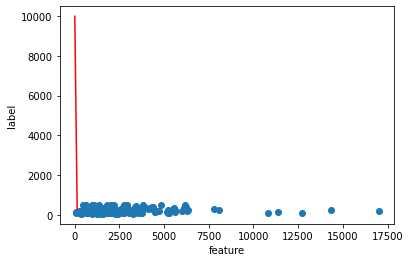

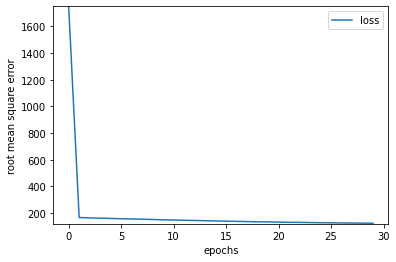

In [9]:
#hyper parameters
learning_rate = 0.01
epochs = 30
batch_size = 30

# feature and label columns
my_feature = "total_rooms"
my_label = "median_house_value"

# call model developin functions
my_model = build_model(learning_rate)

weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epochs, batch_size )

#plot the curves

plot_the_model(weight, bias, my_feature, my_label, training_df)

plot_the_loss_curve(epochs, rmse)

In [10]:
# prediction

def predict_house_prices(n, feature, label):

  batch = training_df[feature][10000 : 10000+n]

  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature  label predicted")

  for i in range(n):

    print("%5.0f  %6.0f %15.0f" % (training_df[feature][10000+i],
                                   training_df[label][10000+i],
                                   predicted_values[i][0]))
    

In [11]:
predict_house_prices(10, my_feature, my_label)

feature  label predicted
 1960      53             165
 3400      92             190
 3677      69             195
 2202      62             170
 2403      80             173
 5652     295             228
 3318     500             188
 2552     342             175
 1364     118             155
 3468     128             191


In [13]:
learning_rate = 0.01
epochs = 18
batch_size = 3

# feature and label columns
my_feature2 = "population"
my_label = "median_house_value"

# call model developin functions
my_model = build_model(learning_rate)

weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature2, my_label, epochs, batch_size )

predict_house_prices(10, my_feature2, my_label)

Epoch 1/18
5667/5667 [==============================] - 5s 856us/step - loss: 51403.2617 - root_mean_squared_error: 226.7229
Epoch 2/18
5667/5667 [==============================] - 5s 854us/step - loss: 25337.4668 - root_mean_squared_error: 159.1775
Epoch 3/18
5667/5667 [==============================] - 5s 844us/step - loss: 21788.2266 - root_mean_squared_error: 147.6084
Epoch 4/18
5667/5667 [==============================] - 5s 931us/step - loss: 19501.8984 - root_mean_squared_error: 139.6492
Epoch 5/18
5667/5667 [==============================] - 5s 881us/step - loss: 17506.3047 - root_mean_squared_error: 132.3114
Epoch 6/18
5667/5667 [==============================] - 5s 849us/step - loss: 16320.6982 - root_mean_squared_error: 127.7525
Epoch 7/18
5667/5667 [==============================] - 5s 845us/step - loss: 15461.5635 - root_mean_squared_error: 124.3445
Epoch 8/18
5667/5667 [==============================] - 5s 853us/step - loss: 14849.9082 - root_mean_squared_error: 121.8602


In [15]:
learning_rate = 0.06
epochs = 24
batch_size = 30

training_df['rooms_per_person'] = training_df['total_rooms']/training_df['population']
# feature and label columns
my_feature2 = "rooms_per_person"
my_label = "median_house_value"

# call model developin functions
my_model = build_model(learning_rate)

weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature2, my_label, epochs, batch_size )

predict_house_prices(10, my_feature2, my_label)

Epoch 1/24
567/567 [==============================] - 0s 856us/step - loss: 37366.3047 - root_mean_squared_error: 193.3037
Epoch 2/24
567/567 [==============================] - 0s 849us/step - loss: 18871.3711 - root_mean_squared_error: 137.3731
Epoch 3/24
567/567 [==============================] - 0s 866us/step - loss: 15059.5469 - root_mean_squared_error: 122.7173
Epoch 4/24
567/567 [==============================] - 0s 866us/step - loss: 14857.9307 - root_mean_squared_error: 121.8931
Epoch 5/24
567/567 [==============================] - 1s 915us/step - loss: 14682.9922 - root_mean_squared_error: 121.1734
Epoch 6/24
567/567 [==============================] - 0s 851us/step - loss: 14503.5498 - root_mean_squared_error: 120.4307
Epoch 7/24
567/567 [==============================] - 0s 865us/step - loss: 14390.4033 - root_mean_squared_error: 119.9600
Epoch 8/24
567/567 [==============================] - 0s 877us/step - loss: 14245.1338 - root_mean_squared_error: 119.3530
Epoch 9/24
567/5